# **INSTALL**

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# **IMPORT LIBRARY DAN DATASET**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from scipy.stats import randint
from scipy.stats import uniform
from imblearn.combine import SMOTEENN

In [10]:
# Muat dataset
application_record = pd.read_csv('DATASET/application_record.csv')

credit_record = pd.read_csv('DATASET/credit_record.csv')

# **CHECK GENERAL INFORMATION**

In [11]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [12]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [13]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [15]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [16]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


# **EDA**

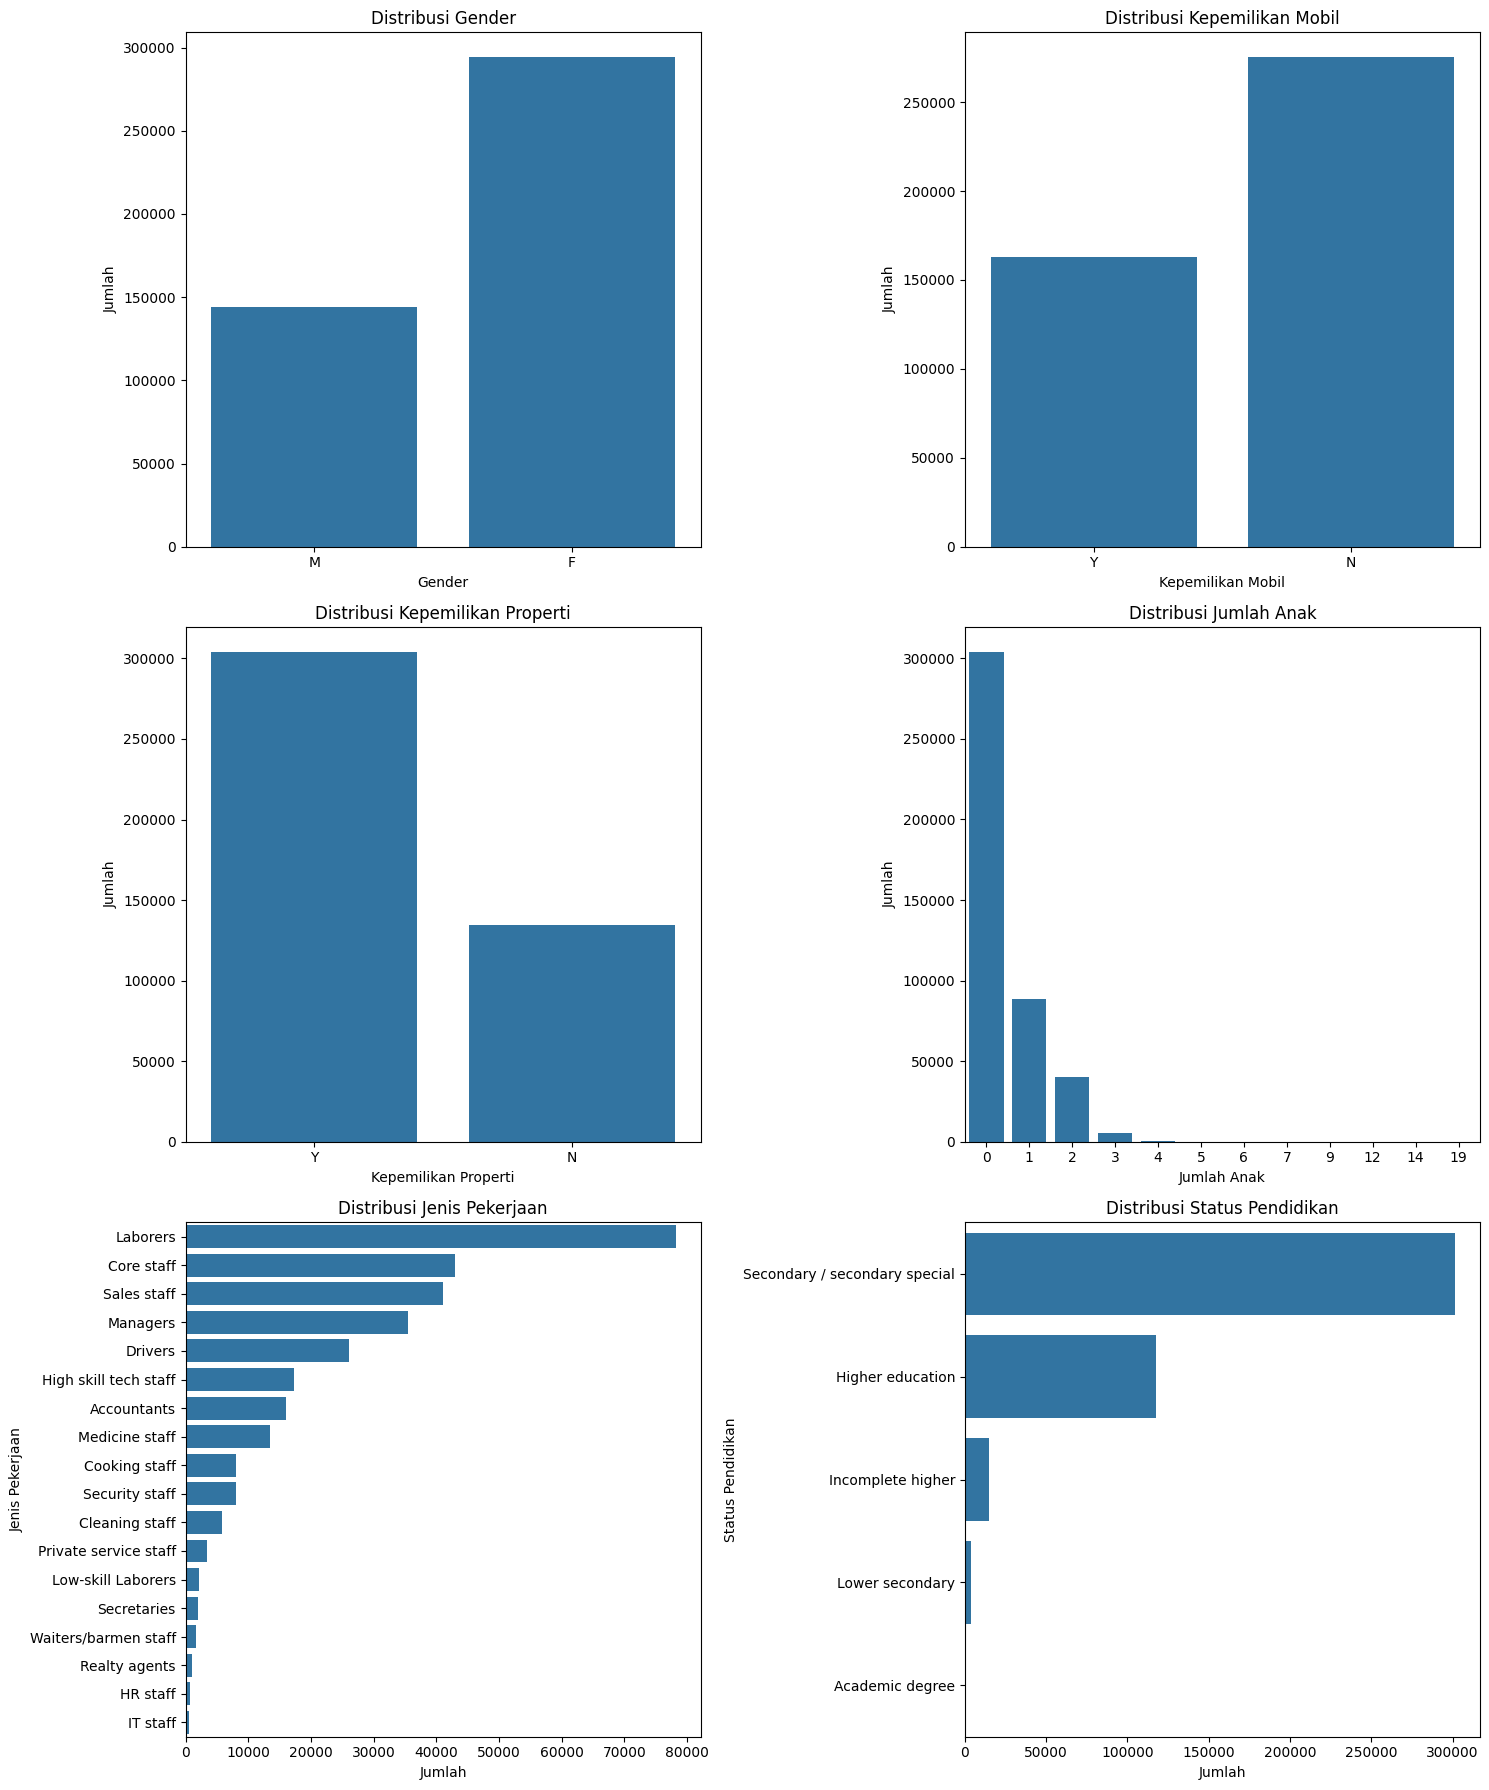

In [17]:
plt.figure(figsize=(15, 18))

# Visualisasi distribusi gender
plt.subplot(3, 2, 1)
sns.countplot(x='CODE_GENDER', data=application_record)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Visualisasi distribusi kepemilikan mobil
plt.subplot(3, 2, 2)
sns.countplot(x='FLAG_OWN_CAR', data=application_record)
plt.title('Distribusi Kepemilikan Mobil')
plt.xlabel('Kepemilikan Mobil')
plt.ylabel('Jumlah')

# Visualisasi distribusi kepemilikan properti
plt.subplot(3, 2, 3)
sns.countplot(x='FLAG_OWN_REALTY', data=application_record)
plt.title('Distribusi Kepemilikan Properti')
plt.xlabel('Kepemilikan Properti')
plt.ylabel('Jumlah')

# Visualisasi distribusi jumlah anak
plt.subplot(3, 2, 4)
sns.countplot(x='CNT_CHILDREN', data=application_record)
plt.title('Distribusi Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Jumlah')

# Visualisasi distribusi jenis pekerjaan
plt.subplot(3, 2, 5)
sns.countplot(y='OCCUPATION_TYPE', data=application_record, order=application_record['OCCUPATION_TYPE'].value_counts().index)
plt.title('Distribusi Jenis Pekerjaan')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Pekerjaan')

# Visualisasi distribusi status pendidikan
plt.subplot(3, 2, 6)
sns.countplot(y='NAME_EDUCATION_TYPE', data=application_record, order=application_record['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Distribusi Status Pendidikan')
plt.xlabel('Jumlah')
plt.ylabel('Status Pendidikan')

plt.tight_layout()
plt.show()

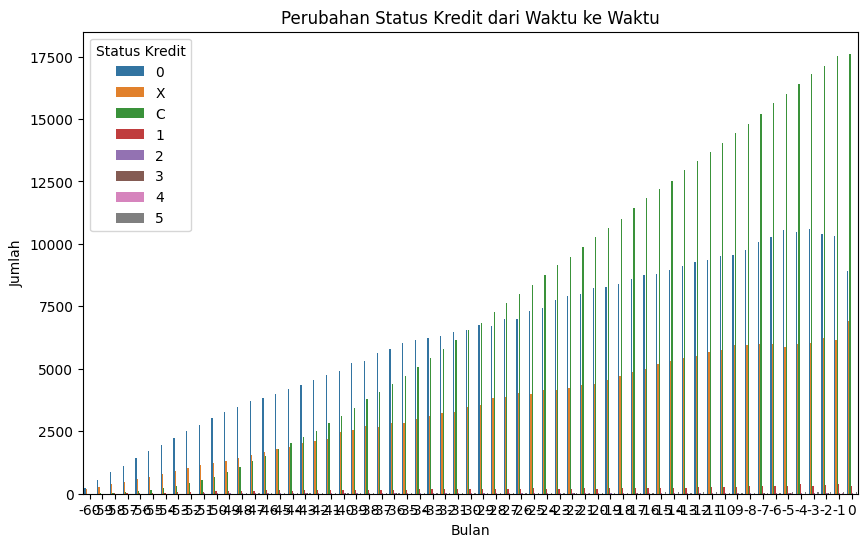

In [18]:
# Perubahan status kredit dari waktu ke waktu
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTHS_BALANCE', data=credit_record, hue='STATUS')
plt.title('Perubahan Status Kredit dari Waktu ke Waktu')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.legend(title='Status Kredit')
plt.show()

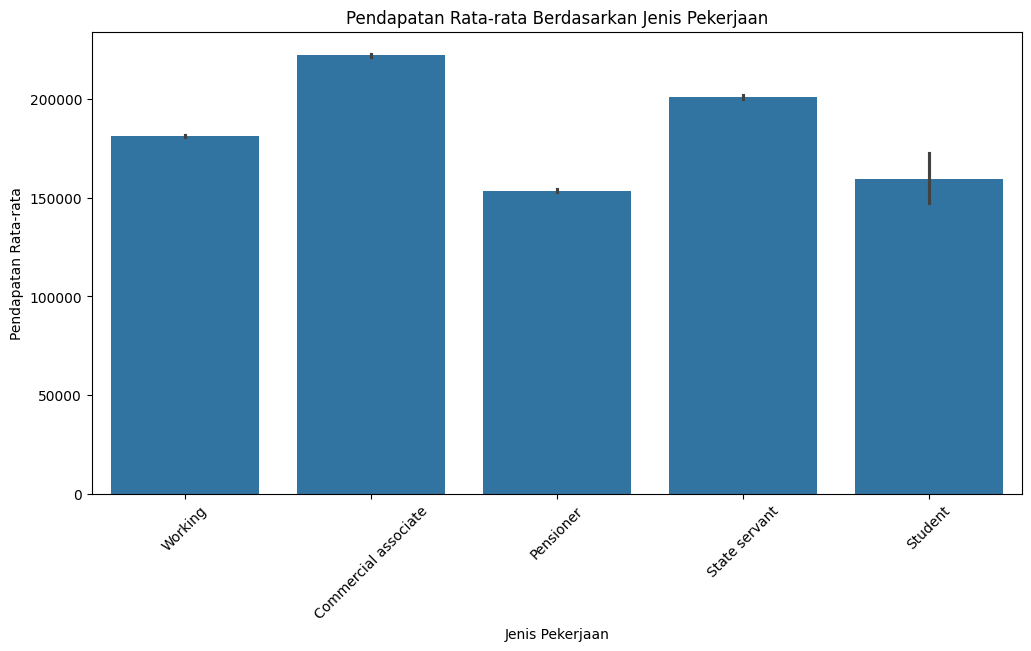

In [19]:
# Pendapatan rata-rata berdasarkan jenis pekerjaan
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=application_record)
plt.title('Pendapatan Rata-rata Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Pendapatan Rata-rata')
plt.xticks(rotation=45)
plt.show()

# **PREPROCESSING**

In [20]:
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [21]:
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [22]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [23]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [24]:
# Check duplicates in application_record dataset
application_record_duplicates = application_record.iloc[:, 1:].duplicated()
application_record_duplicates_count = application_record_duplicates.sum()
application_record_duplicates_percentage = round(100 * application_record_duplicates_count / len(application_record), 1)

print(f'Duplicates in application_record df: {application_record_duplicates_count}, ({application_record_duplicates_percentage}%)')
print('')

# Check duplicates in credit_record dataset
credit_record_duplicates = credit_record.duplicated()
credit_record_duplicates_count = credit_record_duplicates.sum()
credit_record_duplicates_percentage = round(100 * credit_record_duplicates_count / len(credit_record), 1)

print(f'Duplicates in credit_record df: {credit_record_duplicates_count}, ({credit_record_duplicates_percentage}%)')

Duplicates in application_record df: 348472, (79.5%)

Duplicates in credit_record df: 0, (0.0%)


In [25]:
# Drop duplicates in application_record dataset
application_record.drop_duplicates(subset=application_record.columns[1:], keep='first', inplace=True)

In [26]:
# Drop Missing Value
application_record['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [27]:
# Drop constant feature
application_record.drop('FLAG_MOBIL', axis=1, inplace=True)

In [28]:
# Construct target
credit_record['target']=credit_record['STATUS']
credit_record['target'].replace('X', 0, inplace=True)
credit_record['target'].replace('C', 0, inplace=True)
credit_record['target']=credit_record['target'].astype(int)
credit_record.loc[credit_record['target']>=1,'target']=1

# target=1 (high risk) iff there is at least one month where user is late on payments by 30 days or more
target_df=pd.DataFrame(credit_record.groupby(['ID'])['target'].agg(max)).reset_index()

# Merge dataframes
new_df=pd.merge(application_record, target_df, how='inner', on=['ID'])

In [29]:
# Extract how many months account has been open for
start_df=pd.DataFrame(credit_record.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

# Merge dataframes on ID
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [30]:
# Create age feature
new_df['AGE_YEARS']=-new_df['DAYS_BIRTH']/365.2425
new_df.drop('DAYS_BIRTH', axis=1, inplace=True)

# Create unemployed indicator
new_df['UNEMPLOYED']=0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

# Create years employed feature
new_df['YEARS_EMPLOYED']=-new_df['DAYS_EMPLOYED']/365.2425
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [31]:
# Encode binary features
new_df["CODE_GENDER"] =  new_df["CODE_GENDER"].replace(['F','M'],[0,1])
new_df["FLAG_OWN_CAR"] = new_df["FLAG_OWN_CAR"].replace(["Y","N"],[1,0])
new_df["FLAG_OWN_REALTY"] = new_df["FLAG_OWN_REALTY"].replace(["Y","N"],[1,0])

In [32]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [33]:
new_df['Num_family']=new_df['Num_family'].astype(int)

In [34]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [35]:
new_df=new_df[['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone',
               'Phone', 'Email', 'Unemployed', 'Num_children', 'Num_family',
               'Account_length', 'Total_income', 'Age', 'Years_employed',
               'Income_type', 'Education_type', 'Family_status',
               'Housing_type', 'Occupation_type','Target']]

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int32  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [37]:
import pandas as pd

# Daftar kolom yang diinginkan
columns_of_interest = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Memverifikasi keberadaan kolom-kolom yang diinginkan
for column in columns_of_interest:
    if column in new_df.columns:
        print(f"Data dan jumlahnya untuk kolom {column}:")
        print(new_df[column].value_counts())
        print("\n")
    else:
        print(f"Kolom {column} tidak ditemukan dalam DataFrame.\n")

Data dan jumlahnya untuk kolom Income_type:
Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64


Data dan jumlahnya untuk kolom Education_type:
Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64


Data dan jumlahnya untuk kolom Family_status:
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64


Data dan jumlahnya untuk kolom Housing_type:
Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64


Data

In [38]:
# Import library yang diperlukan
from sklearn.preprocessing import LabelEncoder

# Data awal
income_type_data = [
    'Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student'
]

# Inisialisasi LabelEncoder
label_encoder_income_type = LabelEncoder()

# Fit transform untuk mengubah data menjadi label encoding
encoded_income_type = label_encoder_income_type.fit_transform(income_type_data)

# Tampilkan hasil label encoding
print(dict(zip(income_type_data, encoded_income_type)))

{'Working': 4, 'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3}


In [39]:
# Data awal
education_type_data = [
    'Secondary / secondary special', 'Higher education', 'Incomplete higher',
    'Lower secondary', 'Academic degree'
]

# Inisialisasi LabelEncoder
label_encoder_education_type = LabelEncoder()

# Fit transform untuk mengubah data menjadi label encoding
encoded_education_type = label_encoder_education_type.fit_transform(education_type_data)

# Tampilkan hasil label encoding
print(dict(zip(education_type_data, encoded_education_type)))

{'Secondary / secondary special': 4, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 0}


In [40]:
# Data awal
family_status_data = [
    'Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow'
]

# Inisialisasi LabelEncoder
label_encoder_family_status = LabelEncoder()

# Fit transform untuk mengubah data menjadi label encoding
encoded_family_status = label_encoder_family_status.fit_transform(family_status_data)

# Tampilkan hasil label encoding
print(dict(zip(family_status_data, encoded_family_status)))

{'Married': 1, 'Single / not married': 3, 'Civil marriage': 0, 'Separated': 2, 'Widow': 4}


In [41]:
# Data awal
housing_type_data = [
    'House / apartment', 'With parents', 'Municipal apartment',
    'Rented apartment', 'Office apartment', 'Co-op apartment'
]

# Inisialisasi LabelEncoder
label_encoder_housing_type = LabelEncoder()

# Fit transform untuk mengubah data menjadi label encoding
encoded_housing_type = label_encoder_housing_type.fit_transform(housing_type_data)

# Tampilkan hasil label encoding
print(dict(zip(housing_type_data, encoded_housing_type)))


{'House / apartment': 1, 'With parents': 5, 'Municipal apartment': 2, 'Rented apartment': 4, 'Office apartment': 3, 'Co-op apartment': 0}


In [42]:
# Data awal
occupation_type_data = [
    'Other', 'Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
    'High skill tech staff', 'Accountants', 'Medicine staff', 'Cooking staff',
    'Security staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers',
    'Secretaries', 'Waiters/barmen staff', 'HR staff', 'IT staff', 'Realty agents'
]

# Inisialisasi LabelEncoder
label_encoder_occupation_type = LabelEncoder()

# Fit transform untuk mengubah data menjadi label encoding
encoded_occupation_type = label_encoder_occupation_type.fit_transform(occupation_type_data)

# Tampilkan hasil label encoding
print(dict(zip(occupation_type_data, encoded_occupation_type)))

{'Other': 12, 'Laborers': 8, 'Sales staff': 15, 'Core staff': 3, 'Managers': 10, 'Drivers': 4, 'High skill tech staff': 6, 'Accountants': 0, 'Medicine staff': 11, 'Cooking staff': 2, 'Security staff': 17, 'Cleaning staff': 1, 'Private service staff': 13, 'Low-skill Laborers': 9, 'Secretaries': 16, 'Waiters/barmen staff': 18, 'HR staff': 5, 'IT staff': 7, 'Realty agents': 14}


In [43]:
# Ganti nilai-nilai dalam kolom-kolom yang memerlukan label encoding
new_df['Income_type'] = label_encoder_income_type.transform(new_df['Income_type'])
new_df['Education_type'] = label_encoder_education_type.transform(new_df['Education_type'])
new_df['Family_status'] = label_encoder_family_status.transform(new_df['Family_status'])
new_df['Housing_type'] = label_encoder_housing_type.transform(new_df['Housing_type'])
new_df['Occupation_type'] = label_encoder_occupation_type.transform(new_df['Occupation_type'])

# **RESAMPLING**

In [44]:
# Cek distribusi kelas sebelum resampling
class_distribution = new_df['Target'].value_counts()
print(class_distribution)

Target
0    8426
1    1283
Name: count, dtype: int64


In [45]:
from imblearn.combine import SMOTEENN

# Pisahkan fitur dan target
X = new_df.drop(columns=['Target'])
y = new_df['Target']

# Inisialisasi SMOTE dan RandomUnderSampler
smote_enn = SMOTEENN(sampling_strategy=1.0)

# Lakukan resampling
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Periksa distribusi kelas setelah resampling
class_distribution_resampled = y_resampled.value_counts()
print(class_distribution_resampled)

Target
1    3927
0    3749
Name: count, dtype: int64


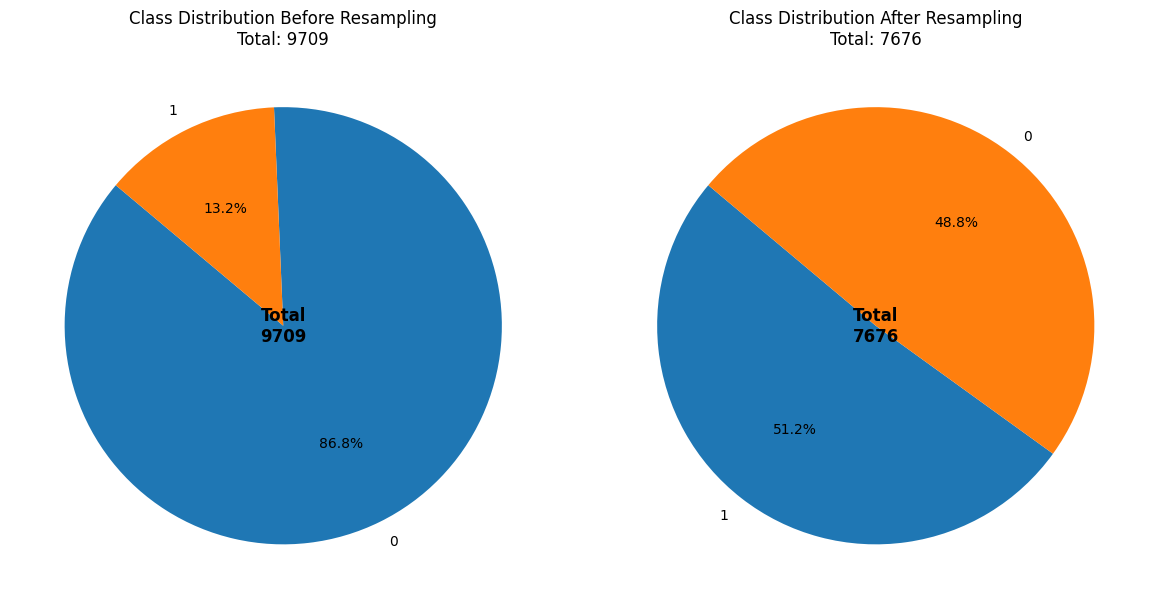

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung distribusi kelas sebelum resampling
class_distribution = new_df['Target'].value_counts()

# Hitung distribusi kelas setelah resampling (asumsi y_resampled adalah hasil dari resampling)
class_distribution_after = pd.Series(y_resampled).value_counts()

# Plotting pie chart for class distribution before and after resampling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart sebelum resampling
axes[0].pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Class Distribution Before Resampling\nTotal: {}'.format(len(new_df)))

# Tambahkan jumlah di tengah pie chart
total_before = len(new_df)
axes[0].text(0, 0, f'Total\n{total_before}', ha='center', va='center', fontsize=12, fontweight='bold')

# Pie chart setelah resampling
axes[1].pie(class_distribution_after, labels=class_distribution_after.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Class Distribution After Resampling\nTotal: {}'.format(len(y_resampled)))

# Tambahkan jumlah di tengah pie chart
total_after = len(y_resampled)
axes[1].text(0, 0, f'Total\n{total_after}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

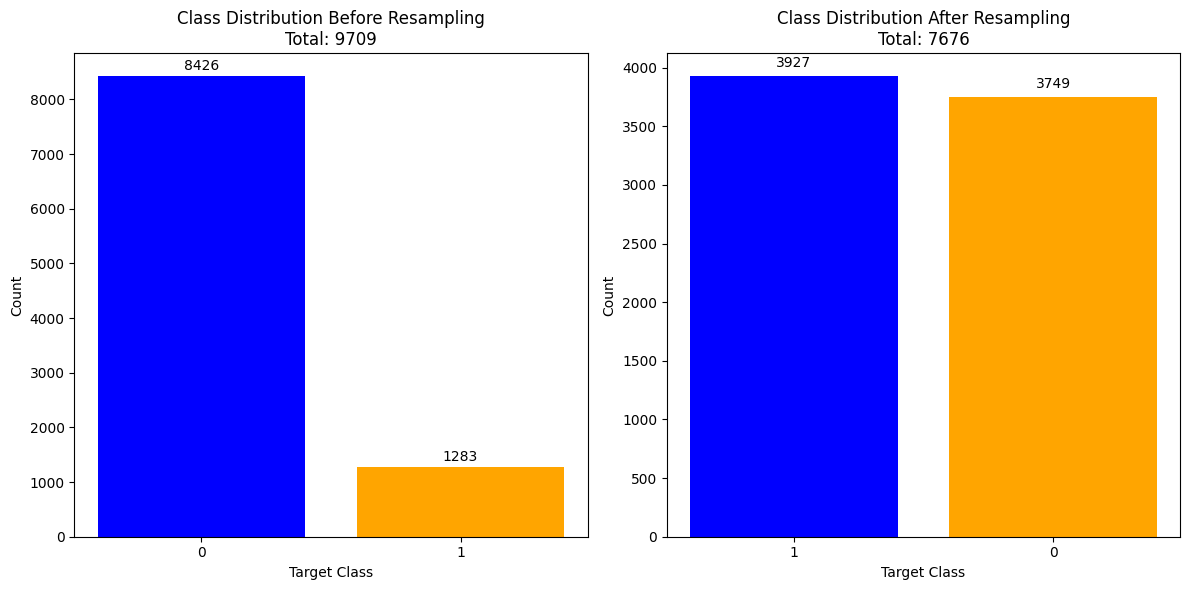

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung distribusi kelas sebelum resampling
class_distribution = new_df['Target'].value_counts()

# Hitung distribusi kelas setelah resampling
class_distribution_after = pd.Series(y_resampled).value_counts()

# Plotting bar chart for class distribution before and after resampling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart sebelum resampling
axes[0].bar(class_distribution.index.astype(str), class_distribution.values, color=['blue', 'orange'])
axes[0].set_title(f'Class Distribution Before Resampling\nTotal: {len(new_df)}')
axes[0].set_xlabel('Target Class')
axes[0].set_ylabel('Count')
for i, v in enumerate(class_distribution.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom')

# Bar chart setelah resampling
axes[1].bar(class_distribution_after.index.astype(str), class_distribution_after.values, color=['blue', 'orange'])
axes[1].set_title(f'Class Distribution After Resampling\nTotal: {len(y_resampled)}')
axes[1].set_xlabel('Target Class')
axes[1].set_ylabel('Count')
for i, v in enumerate(class_distribution_after.values):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **EDA SETELAH DI PREPROCESSING**

In [48]:
new_df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int32  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int32  
 15  Education_type   9709 non-null   int32  
 16  Family_status    9709 non-null   int32  
 17  Housing_type  

In [50]:
new_df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,2.369451,3.150170,1.379648,1.274488,9.221135,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,1.742539,1.315303,0.970125,0.929836,4.275584,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,4.000000,4.000000,1.000000,1.000000,10.000000,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,4.000000,4.000000,1.000000,1.000000,12.000000,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,4.000000,4.000000,4.000000,5.000000,18.000000,1.000000


# **SPLIT DATA**

In [51]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [52]:
X_train.drop('ID', axis=1, inplace=True)
X_test.drop('ID', axis=1, inplace=True)

In [53]:
print(X_train.dtypes)

Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int32
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type          int32
Education_type       int32
Family_status        int32
Housing_type         int32
Occupation_type      int32
dtype: object


In [54]:
# Periksa bentuk data setelah pembagian
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training data shape: (6140, 18)
Testing data shape: (1536, 18)
Training labels shape: (6140,)
Testing labels shape: (1536,)


# **MODELING**

**RANDOM FOREST**

In [55]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for Random Forest
rf_random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters for Random Forest:", rf_random_search.best_params_)

# Predictions with the best Random Forest model
rf_best_model = rf_random_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 227}


**LOGISTIC REGRESSION**

In [56]:
# Define parameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Initialize RandomizedSearchCV for Logistic Regression
lr_random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_param_grid, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for Logistic Regression
lr_random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("\nBest parameters for Logistic Regression:", lr_random_search.best_params_)

# Predictions with the best Logistic Regression model
lr_best_model = lr_random_search.best_estimator_
lr_y_pred = lr_best_model.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters for Logistic Regression: {'tol': 0.001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}


**GRADIENT BOOST**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_param_grid, n_iter=100, cv=3,
                                      verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for Gradient Boosting
gb_random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)

# Predictions with the best Gradient Boosting model
gb_best_model = gb_random_search.best_estimator_
gb_y_pred = gb_best_model.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Gradient Boosting: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 9, 'learning_rate': 0.5}


**K-Nearest Neighbors (KNN)**

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Initialize RandomizedSearchCV for KNN
knn_random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for KNN
knn_random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters for K-Nearest Neighbors:", knn_random_search.best_params_)

# Predictions with the best KNN model
knn_best_model = knn_random_search.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for K-Nearest Neighbors: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}


**Decision Tree**

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for Decision Tree
dt_random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters for Decision Tree:", dt_random_search.best_params_)

# Predictions with the best Decision Tree model
dt_best_model = dt_random_search.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Decision Tree: {'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 16, 'criterion': 'entropy'}


# **EVALUASI**

**RANDOM FOREST**

KFold Cross-Validation Results for Random Forest:
KFold Accuracy (%) Precision (%) Recall (%) F1-score (%)
    1        88.93         90.36      87.58        88.95
    2        86.51         87.48      86.04        86.76
    3        88.99         90.82      87.75        89.26
    4        89.19         90.62      87.56        89.06
    5        89.58         92.18      87.02        89.53
 Mean        88.64         90.29      87.19        88.71


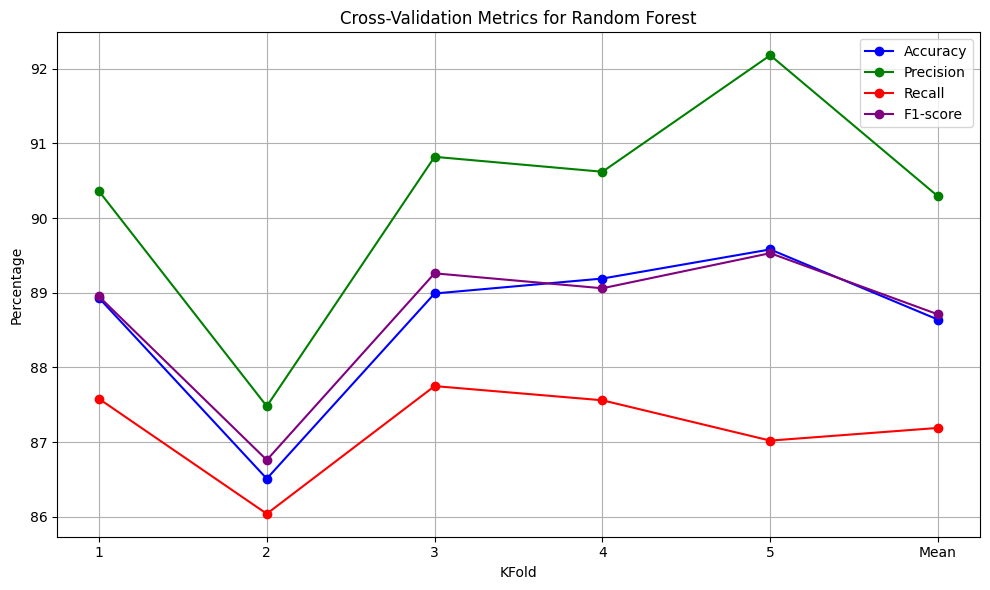

In [60]:
# Objek KFold dengan 5 lipatan
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross validation untuk model terbaik (rf_best_model)
cv_accuracy_rf = cross_val_score(rf_best_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
cv_precision_rf = cross_val_score(rf_best_model, X_resampled, y_resampled, cv=kf, scoring='precision')
cv_recall_rf = cross_val_score(rf_best_model, X_resampled, y_resampled, cv=kf, scoring='recall')
cv_f1_rf = cross_val_score(rf_best_model, X_resampled, y_resampled, cv=kf, scoring='f1')

# Hitung rata-rata dari masing-masing metrik dalam persentase
mean_accuracy_rf = cv_accuracy_rf.mean() * 100
mean_precision_rf = cv_precision_rf.mean() * 100
mean_recall_rf = cv_recall_rf.mean() * 100
mean_f1_rf = cv_f1_rf.mean() * 100

# Susun dalam bentuk dataframe
results_rf = pd.DataFrame({
    "KFold": ["1", "2", "3", "4", "5", "Mean"],
    "Accuracy (%)": [f"{score * 100:.2f}" for score in cv_accuracy_rf] + [f"{mean_accuracy_rf:.2f}"],
    "Precision (%)": [f"{score * 100:.2f}" for score in cv_precision_rf] + [f"{mean_precision_rf:.2f}"],
    "Recall (%)": [f"{score * 100:.2f}" for score in cv_recall_rf] + [f"{mean_recall_rf:.2f}"],
    "F1-score (%)": [f"{score * 100:.2f}" for score in cv_f1_rf] + [f"{mean_f1_rf:.2f}"]
})

# Tampilkan tabel
print("KFold Cross-Validation Results for Random Forest:")
print(results_rf.to_string(index=False))

# Visualisasi evaluasi (opsional)
plt.figure(figsize=(10, 6))

plt.plot(results_rf['KFold'], results_rf['Accuracy (%)'].astype(float), marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(results_rf['KFold'], results_rf['Precision (%)'].astype(float), marker='o', linestyle='-', color='g', label='Precision')
plt.plot(results_rf['KFold'], results_rf['Recall (%)'].astype(float), marker='o', linestyle='-', color='r', label='Recall')
plt.plot(results_rf['KFold'], results_rf['F1-score (%)'].astype(float), marker='o', linestyle='-', color='purple', label='F1-score')

plt.title('Cross-Validation Metrics for Random Forest')
plt.xlabel('KFold')
plt.ylabel('Percentage')
plt.xticks(["1", "2", "3", "4", "5", "Mean"])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION**

KFold Cross-Validation Results for Logistic Regression:
KFold Accuracy (%) Precision (%) Recall (%) F1-score (%)
    1        73.96         74.71      73.75        74.23
    2        73.88         73.45      76.90        75.14
    3        74.59         74.23      78.50        76.31
    4        75.05         73.69      78.37        75.96
    5        74.72         74.69      76.59        75.63
 Mean        74.44         74.15      76.82        75.45


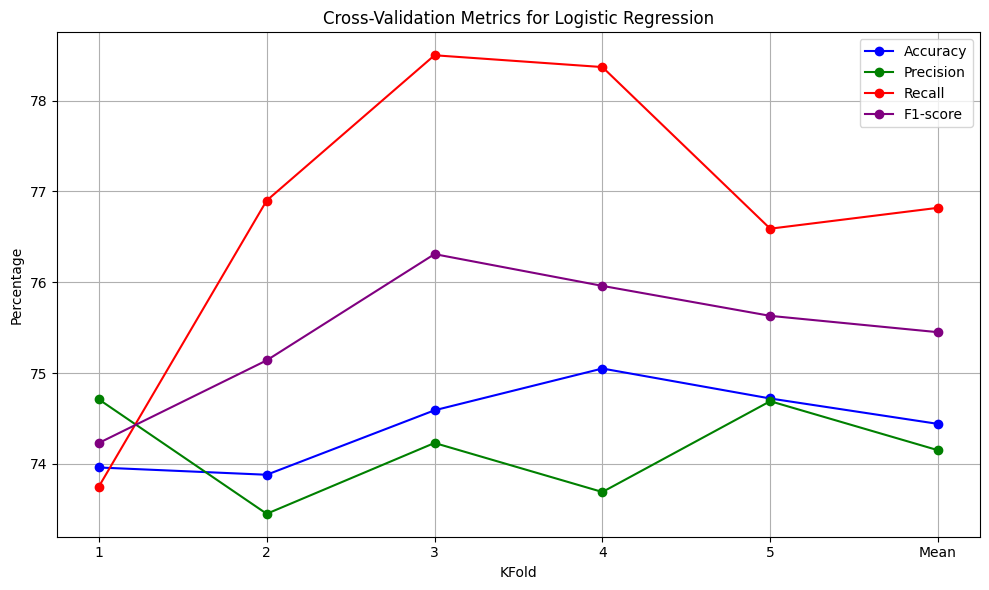

In [61]:
# Objek KFold dengan 5 lipatan
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross validation untuk model terbaik (lr_best_model)
cv_accuracy_lr = cross_val_score(lr_best_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
cv_precision_lr = cross_val_score(lr_best_model, X_resampled, y_resampled, cv=kf, scoring='precision')
cv_recall_lr = cross_val_score(lr_best_model, X_resampled, y_resampled, cv=kf, scoring='recall')
cv_f1_lr = cross_val_score(lr_best_model, X_resampled, y_resampled, cv=kf, scoring='f1')

# Hitung rata-rata dari masing-masing metrik dalam persentase
mean_accuracy_lr = cv_accuracy_lr.mean() * 100
mean_precision_lr = cv_precision_lr.mean() * 100
mean_recall_lr = cv_recall_lr.mean() * 100
mean_f1_lr = cv_f1_lr.mean() * 100

# Susun dalam bentuk dataframe
results_lr = pd.DataFrame({
    "KFold": ["1", "2", "3", "4", "5", "Mean"],
    "Accuracy (%)": [f"{score * 100:.2f}" for score in cv_accuracy_lr] + [f"{mean_accuracy_lr:.2f}"],
    "Precision (%)": [f"{score * 100:.2f}" for score in cv_precision_lr] + [f"{mean_precision_lr:.2f}"],
    "Recall (%)": [f"{score * 100:.2f}" for score in cv_recall_lr] + [f"{mean_recall_lr:.2f}"],
    "F1-score (%)": [f"{score * 100:.2f}" for score in cv_f1_lr] + [f"{mean_f1_lr:.2f}"]
})

# Tampilkan tabel
print("KFold Cross-Validation Results for Logistic Regression:")
print(results_lr.to_string(index=False))

# Visualisasi evaluasi (opsional)
plt.figure(figsize=(10, 6))

plt.plot(results_lr['KFold'], results_lr['Accuracy (%)'].astype(float), marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(results_lr['KFold'], results_lr['Precision (%)'].astype(float), marker='o', linestyle='-', color='g', label='Precision')
plt.plot(results_lr['KFold'], results_lr['Recall (%)'].astype(float), marker='o', linestyle='-', color='r', label='Recall')
plt.plot(results_lr['KFold'], results_lr['F1-score (%)'].astype(float), marker='o', linestyle='-', color='purple', label='F1-score')

plt.title('Cross-Validation Metrics for Logistic Regression')
plt.xlabel('KFold')
plt.ylabel('Percentage')
plt.xticks(["1", "2", "3", "4", "5", "Mean"])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**GRADIENT BOOST**

KFold Cross-Validation Results for Gradient Boosting:
KFold Accuracy (%) Precision (%) Recall (%) F1-score (%)
    1        93.16         94.01      92.45        93.22
    2        90.16         89.96      90.99        90.47
    3        91.73         92.01      92.12        92.07
    4        92.70         94.00      91.32        92.64
    5        92.38         93.27      91.73        92.50
 Mean        92.03         92.65      91.72        92.18


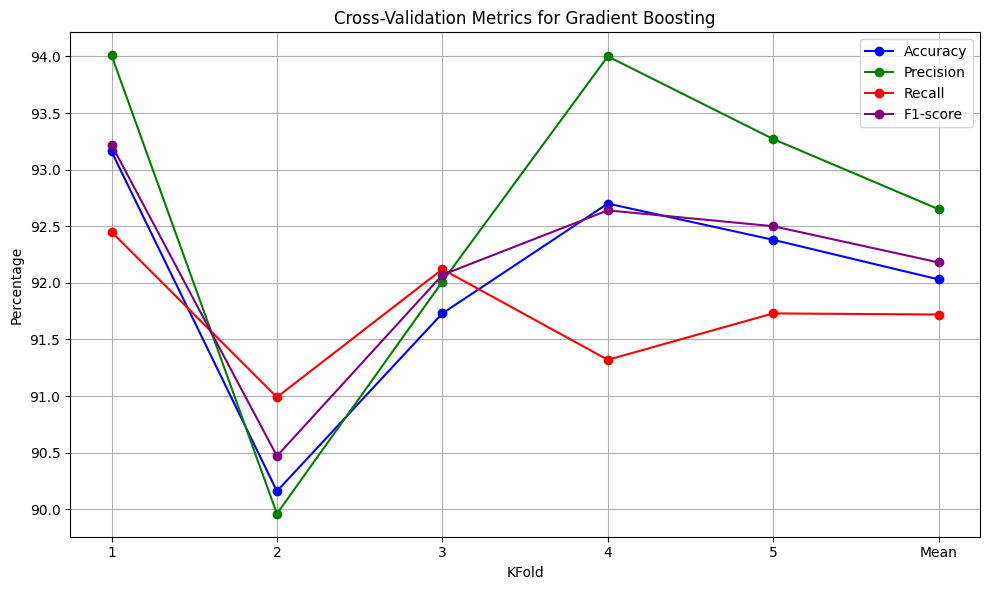

In [62]:
# Objek KFold dengan 5 lipatan
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross validation untuk model terbaik (gb_best_model)
cv_accuracy_gb = cross_val_score(gb_best_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
cv_precision_gb = cross_val_score(gb_best_model, X_resampled, y_resampled, cv=kf, scoring='precision')
cv_recall_gb = cross_val_score(gb_best_model, X_resampled, y_resampled, cv=kf, scoring='recall')
cv_f1_gb = cross_val_score(gb_best_model, X_resampled, y_resampled, cv=kf, scoring='f1')

# Hitung rata-rata dari masing-masing metrik dalam persentase
mean_accuracy_gb = cv_accuracy_gb.mean() * 100
mean_precision_gb = cv_precision_gb.mean() * 100
mean_recall_gb = cv_recall_gb.mean() * 100
mean_f1_gb = cv_f1_gb.mean() * 100

# Susun dalam bentuk dataframe
results_gb = pd.DataFrame({
    "KFold": ["1", "2", "3", "4", "5", "Mean"],
    "Accuracy (%)": [f"{score * 100:.2f}" for score in cv_accuracy_gb] + [f"{mean_accuracy_gb:.2f}"],
    "Precision (%)": [f"{score * 100:.2f}" for score in cv_precision_gb] + [f"{mean_precision_gb:.2f}"],
    "Recall (%)": [f"{score * 100:.2f}" for score in cv_recall_gb] + [f"{mean_recall_gb:.2f}"],
    "F1-score (%)": [f"{score * 100:.2f}" for score in cv_f1_gb] + [f"{mean_f1_gb:.2f}"]
})

# Tampilkan tabel
print("KFold Cross-Validation Results for Gradient Boosting:")
print(results_gb.to_string(index=False))

# Visualisasi evaluasi (opsional)
plt.figure(figsize=(10, 6))

plt.plot(results_gb['KFold'], results_gb['Accuracy (%)'].astype(float), marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(results_gb['KFold'], results_gb['Precision (%)'].astype(float), marker='o', linestyle='-', color='g', label='Precision')
plt.plot(results_gb['KFold'], results_gb['Recall (%)'].astype(float), marker='o', linestyle='-', color='r', label='Recall')
plt.plot(results_gb['KFold'], results_gb['F1-score (%)'].astype(float), marker='o', linestyle='-', color='purple', label='F1-score')

plt.title('Cross-Validation Metrics for Gradient Boosting')
plt.xlabel('KFold')
plt.ylabel('Percentage')
plt.xticks(["1", "2", "3", "4", "5", "Mean"])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**K-Nearest Neighbors (KNN)**

KFold Cross-Validation Results for K-Nearest Neighbors:
KFold Accuracy (%) Precision (%) Recall (%) F1-score (%)
    1        91.99         92.51      91.68        92.09
    2        89.84         91.04      88.96        89.99
    3        93.16         93.38      93.50        93.44
    4        90.42         88.92      92.49        90.67
    5        91.40         90.88      92.49        91.68
 Mean        91.36         91.34      91.82        91.57


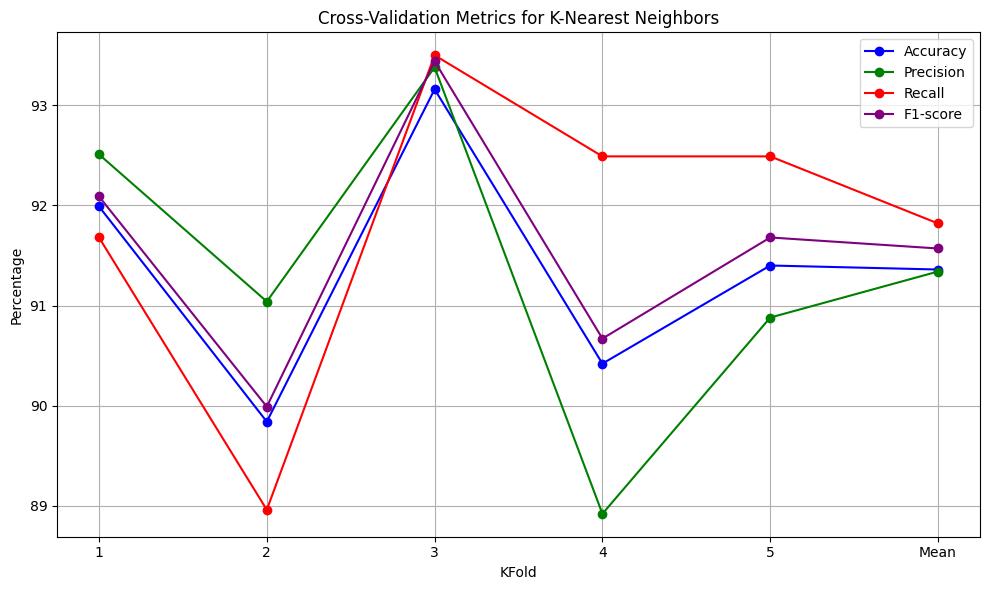

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Objek KFold dengan 5 lipatan
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Lakukan cross validation untuk model KNN
cv_accuracy_knn = cross_val_score(knn_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
cv_precision_knn = cross_val_score(knn_model, X_resampled, y_resampled, cv=kf, scoring='precision')
cv_recall_knn = cross_val_score(knn_model, X_resampled, y_resampled, cv=kf, scoring='recall')
cv_f1_knn = cross_val_score(knn_model, X_resampled, y_resampled, cv=kf, scoring='f1')

# Hitung rata-rata dari masing-masing metrik dalam persentase
mean_accuracy_knn = cv_accuracy_knn.mean() * 100
mean_precision_knn = cv_precision_knn.mean() * 100
mean_recall_knn = cv_recall_knn.mean() * 100
mean_f1_knn = cv_f1_knn.mean() * 100

# Susun dalam bentuk dataframe
results_knn = pd.DataFrame({
    "KFold": ["1", "2", "3", "4", "5", "Mean"],
    "Accuracy (%)": [f"{score * 100:.2f}" for score in cv_accuracy_knn] + [f"{mean_accuracy_knn:.2f}"],
    "Precision (%)": [f"{score * 100:.2f}" for score in cv_precision_knn] + [f"{mean_precision_knn:.2f}"],
    "Recall (%)": [f"{score * 100:.2f}" for score in cv_recall_knn] + [f"{mean_recall_knn:.2f}"],
    "F1-score (%)": [f"{score * 100:.2f}" for score in cv_f1_knn] + [f"{mean_f1_knn:.2f}"]
})

# Tampilkan tabel
print("KFold Cross-Validation Results for K-Nearest Neighbors:")
print(results_knn.to_string(index=False))

# Visualisasi evaluasi (opsional)
plt.figure(figsize=(10, 6))

plt.plot(results_knn['KFold'], results_knn['Accuracy (%)'].astype(float), marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(results_knn['KFold'], results_knn['Precision (%)'].astype(float), marker='o', linestyle='-', color='g', label='Precision')
plt.plot(results_knn['KFold'], results_knn['Recall (%)'].astype(float), marker='o', linestyle='-', color='r', label='Recall')
plt.plot(results_knn['KFold'], results_knn['F1-score (%)'].astype(float), marker='o', linestyle='-', color='purple', label='F1-score')

plt.title('Cross-Validation Metrics for K-Nearest Neighbors')
plt.xlabel('KFold')
plt.ylabel('Percentage')
plt.xticks(["1", "2", "3", "4", "5", "Mean"])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Decision Tree**

KFold Cross-Validation Results for Decision Tree:
KFold Accuracy (%) Precision (%) Recall (%) F1-score (%)
    1        77.54         76.14      81.31        78.64
    2        77.39         75.67      82.49        78.93
    3        78.76         78.42      81.75        80.05
    4        79.48         77.63      83.16        80.30
    5        79.35         77.56      83.97        80.64
 Mean        78.50         77.08      82.53        79.71


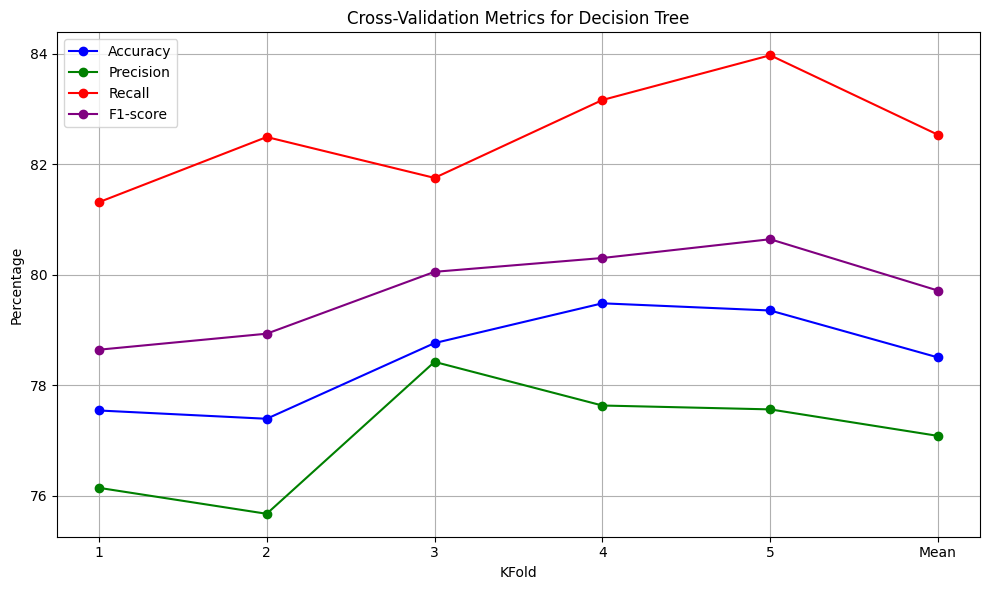

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Objek KFold dengan 5 lipatan
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Lakukan cross validation untuk model Decision Tree
cv_accuracy_dt = cross_val_score(dt_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
cv_precision_dt = cross_val_score(dt_model, X_resampled, y_resampled, cv=kf, scoring='precision')
cv_recall_dt = cross_val_score(dt_model, X_resampled, y_resampled, cv=kf, scoring='recall')
cv_f1_dt = cross_val_score(dt_model, X_resampled, y_resampled, cv=kf, scoring='f1')

# Hitung rata-rata dari masing-masing metrik dalam persentase
mean_accuracy_dt = cv_accuracy_dt.mean() * 100
mean_precision_dt = cv_precision_dt.mean() * 100
mean_recall_dt = cv_recall_dt.mean() * 100
mean_f1_dt = cv_f1_dt.mean() * 100

# Susun dalam bentuk dataframe
results_dt = pd.DataFrame({
    "KFold": ["1", "2", "3", "4", "5", "Mean"],
    "Accuracy (%)": [f"{score * 100:.2f}" for score in cv_accuracy_dt] + [f"{mean_accuracy_dt:.2f}"],
    "Precision (%)": [f"{score * 100:.2f}" for score in cv_precision_dt] + [f"{mean_precision_dt:.2f}"],
    "Recall (%)": [f"{score * 100:.2f}" for score in cv_recall_dt] + [f"{mean_recall_dt:.2f}"],
    "F1-score (%)": [f"{score * 100:.2f}" for score in cv_f1_dt] + [f"{mean_f1_dt:.2f}"]
})

# Tampilkan tabel
print("KFold Cross-Validation Results for Decision Tree:")
print(results_dt.to_string(index=False))

# Visualisasi evaluasi (opsional)
plt.figure(figsize=(10, 6))

plt.plot(results_dt['KFold'], results_dt['Accuracy (%)'].astype(float), marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(results_dt['KFold'], results_dt['Precision (%)'].astype(float), marker='o', linestyle='-', color='g', label='Precision')
plt.plot(results_dt['KFold'], results_dt['Recall (%)'].astype(float), marker='o', linestyle='-', color='r', label='Recall')
plt.plot(results_dt['KFold'], results_dt['F1-score (%)'].astype(float), marker='o', linestyle='-', color='purple', label='F1-score')

plt.title('Cross-Validation Metrics for Decision Tree')
plt.xlabel('KFold')
plt.ylabel('Percentage')
plt.xticks(["1", "2", "3", "4", "5", "Mean"])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# Data hasil evaluasi model
results = {
    'Random Forest': {
        'Accuracy (%)': 88.21,
        'Precision (%)': 89.65,
        'Recall (%)': 86.78,
        'F1-score (%)': 88.19
    },
    'Logistic Regression': {
        'Accuracy (%)': 75.38,
        'Precision (%)': 74.66,
        'Recall (%)': 77.95,
        'F1-score (%)': 76.26
    },
    'Gradient Boosting': {
        'Accuracy (%)': 91.60,
        'Precision (%)': 92.19,
        'Recall (%)': 91.15,
        'F1-score (%)': 91.67
    },
    'K-Nearest Neighbors': {
        'Accuracy (%)': 90.66,
        'Precision (%)': 90.02,
        'Recall (%)': 91.78,
        'F1-score (%)': 90.88
    },
    'Decision Tree': {
        'Accuracy (%)': 79.35,
        'Precision (%)': 78.35,
        'Recall (%)': 81.95,
        'F1-score (%)': 80.10
    }
}

# Konversi ke dalam dataframe
df_results = pd.DataFrame(results).transpose()

# Urutkan berdasarkan Accuracy secara menurun
df_results_sorted_acc = df_results.sort_values(by='Accuracy (%)', ascending=False)

# Tambahkan kolom nomor urutan (ranking)
df_results_sorted_acc['Rank'] = range(1, len(df_results_sorted_acc) + 1)

# Tampilkan hasil pengurutan dengan nama model
print("Model Evaluation Results (Sorted by Accuracy):")
# Menampilkan dalam satu baris dengan format yang rapi, termasuk nama model
print(df_results_sorted_acc.reset_index()[['Rank', 'index', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-score (%)']].to_string(index=False, header=['Rank', 'Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-score (%)']))

Model Evaluation Results (Sorted by Accuracy):
Rank               Model Accuracy (%) Precision (%) Recall (%) F1-score (%)
   1   Gradient Boosting        91.60         92.19      91.15        91.67
   2 K-Nearest Neighbors        90.66         90.02      91.78        90.88
   3       Random Forest        88.21         89.65      86.78        88.19
   4       Decision Tree        79.35         78.35      81.95        80.10
   5 Logistic Regression        75.38         74.66      77.95        76.26


# **Building**

In [66]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
import joblib

In [68]:
# Save the best Gradient Boosting model
joblib.dump(gb_best_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']